#Import Libraries

In [ ]:
import pandas as pd
import numpy as np

#Import Dataset

In [ ]:
from google.colab import files
data = files.upload()

Saving power_plant.csv to power_plant.csv


In [ ]:
import io
data_df = pd.read_csv(io.BytesIO(data['power_plant.csv']))

In [ ]:
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


#Define x and y


In [ ]:
x = data_df.drop(['PE'],axis=1).values
y = data_df['PE'].values

In [ ]:
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [ ]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


#split the dataset in training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

#train the model on the training set

In [ ]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

#predict the test results

In [ ]:
y_pred = ml.predict(x_test)
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [ ]:
ml.predict([[14.96,41.76,1024.07,73.17]])

array([467.34820092])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9304112159477683

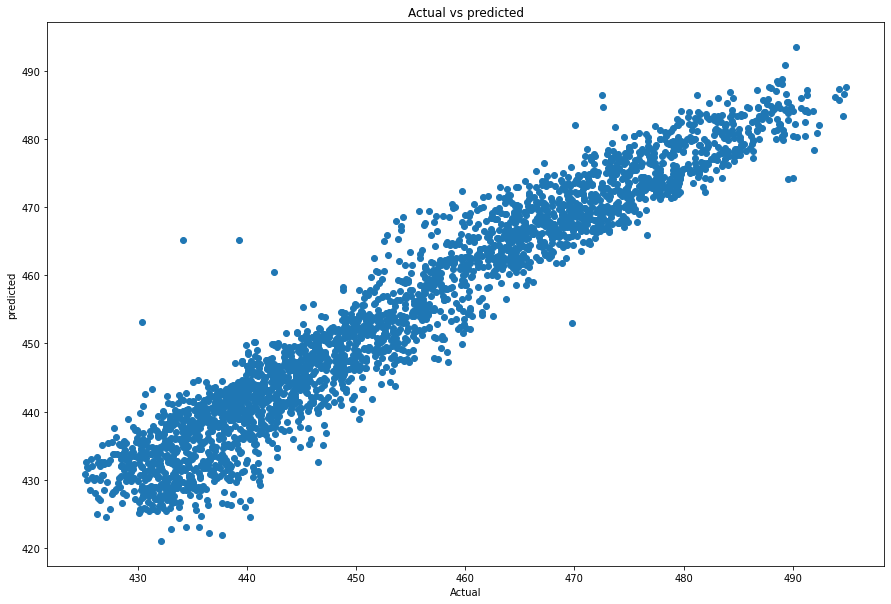

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,10])
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted')
plt.show()

In [ ]:
pred_y_df=pd.DataFrame({'Actual value':y_test,'predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual value,predicted value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
5,432.68,429.676856,3.003144
6,477.50,473.017115,4.482885
7,459.68,456.532373,3.147627
8,477.50,474.342524,3.157476
9,444.99,446.364396,-1.374396
